# Python Project 
## Seoul Bike Sharing

Today, the introduction of rental bikes in many urban areas is aimed at improving mobility. It is essential to guarantee the availability and accessibility of rental bikes to the public in a timely manner, in order to reduce waiting times. Consequently, ensuring a constant supply of rental bikes to meet the city's demand appears to be a major challenge. The key aspect is to accurately predict the number of bikes required for each hour, in order to maintain a stable supply of rental bikes.

### Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from lightgbm import LGBMRegressor
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')
data_num = data.select_dtypes(include=['int64', 'float64']) #we separate the numerical data, which we will use later
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Analyse and Clean the Data
The dataset contains meteorological information (temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, Rainfall, snowfall) and the number of bikes rented per hour with the date information.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


__Understanding the correlation, a statistical metric, reveals the degree of association between two variables.__<br>
Two primary forms of correlation exist: __positive and negative__.<br>

__Positive correlation__ manifests when both variables move in tandem, an increase in one corresponds to an increase in the other.<br>
On the contrary, __negative correlation__ unfolds when variables move in opposite directions, an increase in one coincides with a decrease in the other.<br>

Correlation serves as a tool to examine hypotheses concerning cause-and-effect connections between variables. In practical scenarios, it finds application in predicting trends.

Text(0.5, 1.0, 'Correlation matrix')

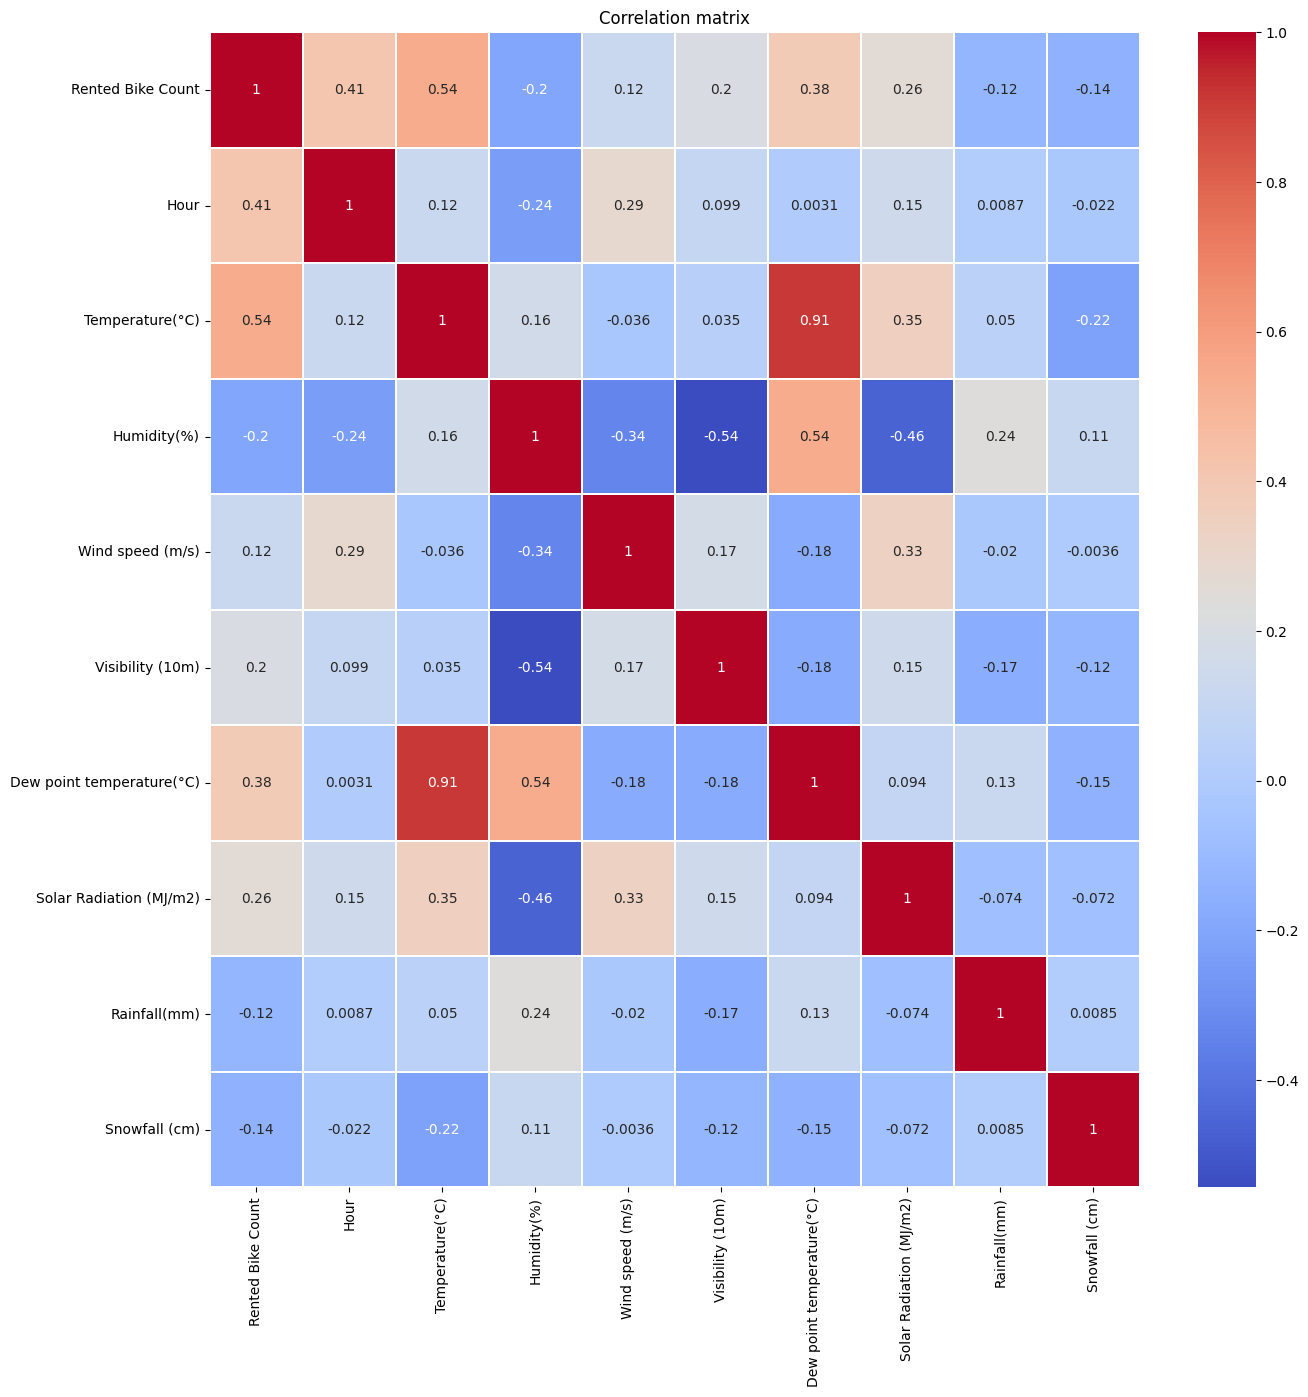

In [5]:
data_corr= data_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data_corr, cmap='coolwarm', annot=True, linewidths=0.2, linecolor='white')
plt.title("Correlation matrix")

We can see that our variable is the most correlated with the Hour, Temperature and also Dew point temperature variables.<br>
But Temperature and Dew point temperature are 0.91 correlated, So it's generate multicollinearity issue. so we drop Dew point temperature feature.

In [6]:
data = data.drop('Dew point temperature(°C)',axis=1)

## Analyzation and Visualization

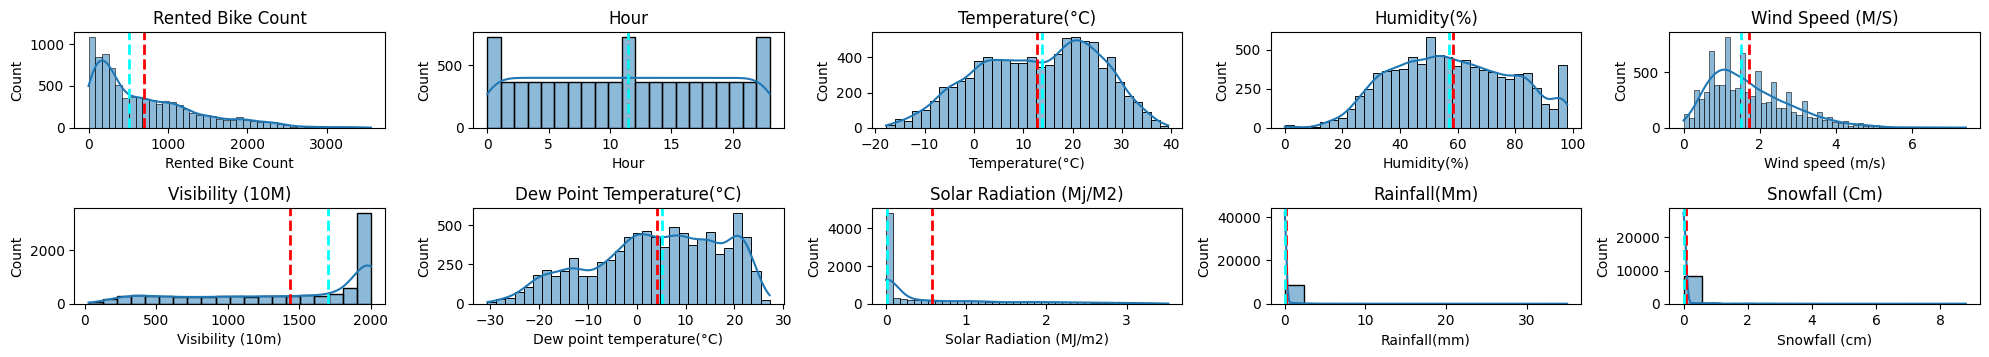

In [7]:
fig = plt.figure(figsize=(20, 5))

for index, column in enumerate(data_num.columns):
    plt.subplot(3, 5, index + 1)
    sns.histplot(data_num[column], kde=True) 
    feature = data_num[column]
    ax = fig.gca()
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)  
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(f'{column.title()}')
    plt.tight_layout()

So we have __Positive Skew distribution__ for ['Rented Bike Count', 'Wind Speed(m/s)', 'Solar Radiation(MJ/m2)']<br>
A __symmetrical Distribution__ for ['Hour', 'Temperature', 'Humidity(%)', 'Rainfall(mm)', 'Snowfall(cm)']<br>
And __Negative Skewed distribution__ for ['visibility(10m)']

Text(0.5, 1.0, 'Bike rental distribution')

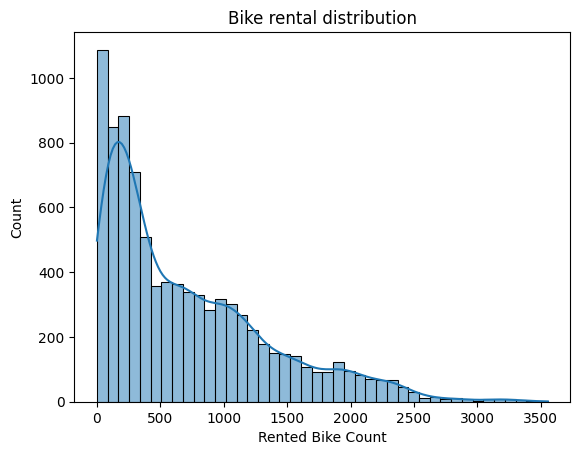

In [8]:
sns.histplot(data['Rented Bike Count'], kde=True)
plt.title("Bike rental distribution")

Text(0.5, 1.0, 'Temperature boxplot')

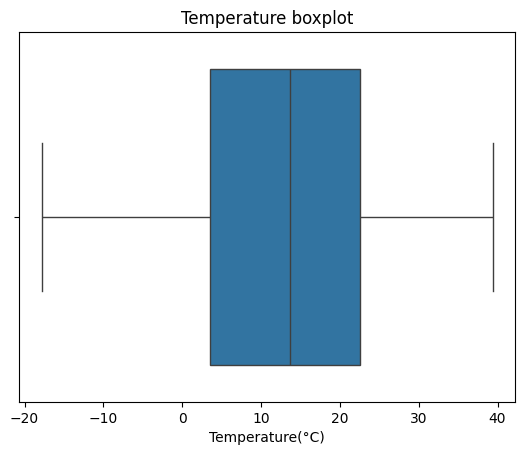

In [9]:
sns.boxplot(data=data, x='Temperature(°C)')
plt.title("Temperature boxplot")

Text(0.5, 1.0, 'Weather vs. Bike Rentals')

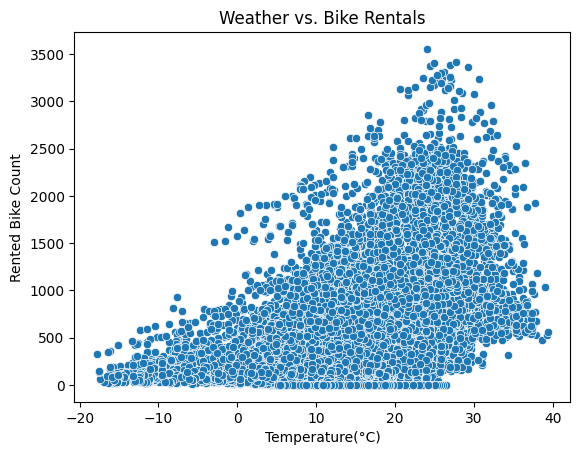

In [10]:
sns.scatterplot(data=data, x='Temperature(°C)', y='Rented Bike Count')
plt.title("Weather vs. Bike Rentals")

Text(0.5, 1.0, 'Evolution of Bike Rentals over Time')

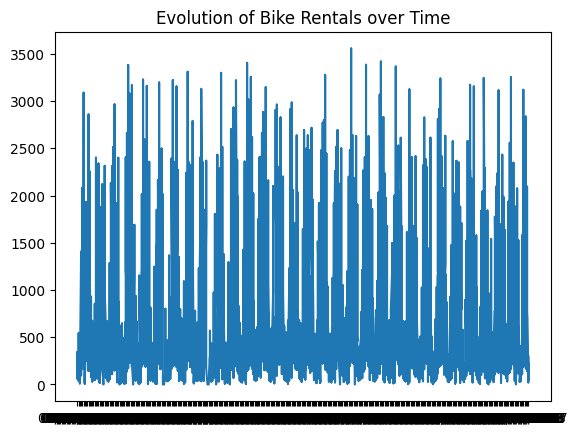

In [11]:
data.sort_values('Date', inplace=True)
plt.plot(data['Date'], data['Rented Bike Count'])
plt.title("Evolution of Bike Rentals over Time")

Text(0.5, 1.0, 'Boxplot of Bike Rentals by Season')

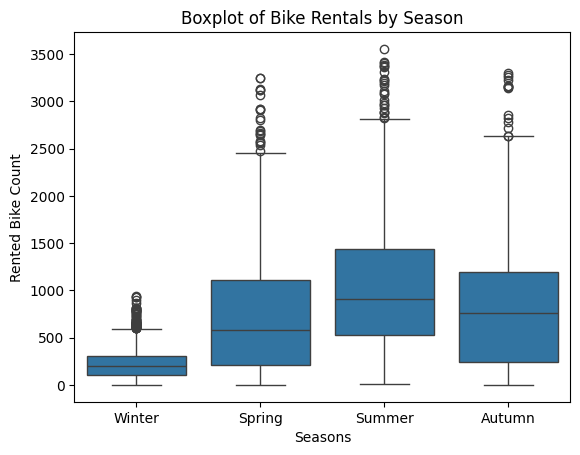

In [12]:
sns.boxplot(data=data, x='Seasons', y='Rented Bike Count')
plt.title("Boxplot of Bike Rentals by Season")

Text(0.5, 0.98, 'Pairplot of Selected Variables')

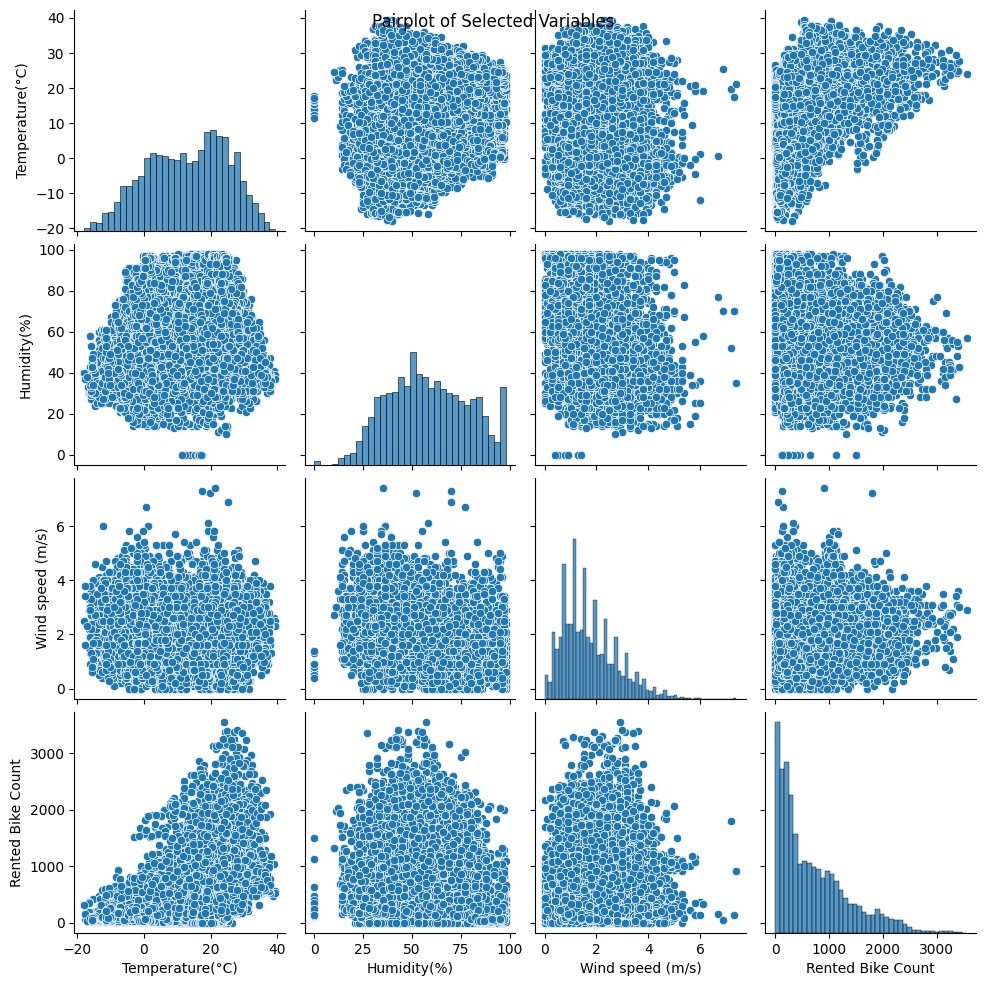

In [13]:
sns.pairplot(data[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Rented Bike Count']])
plt.suptitle("Pairplot of Selected Variables")

In [14]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
scaler = MinMaxScaler()
label_encoder = LabelEncoder()

for col in numerical_cols:
    data[col] = scaler.fit_transform(data[[col]])

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [15]:
X = data_num.drop('Rented Bike Count', axis=1)
y = data_num['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We then start testing all the prediction models we've found, in order to identify which model would be the most consistent and effective with our dataset.

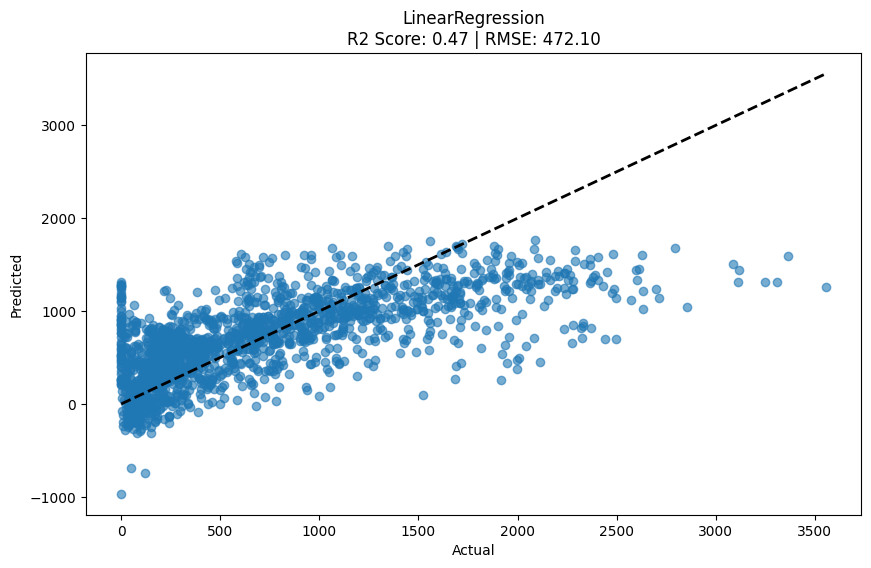

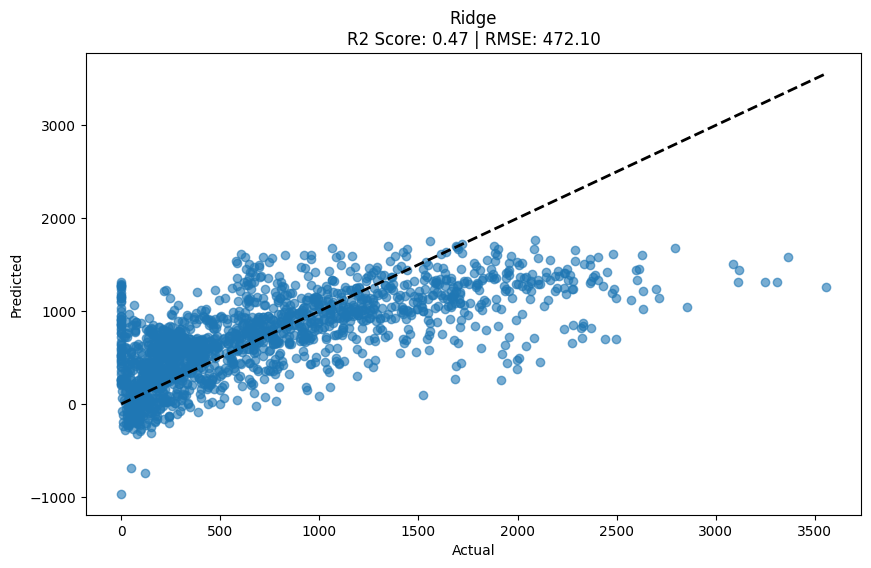

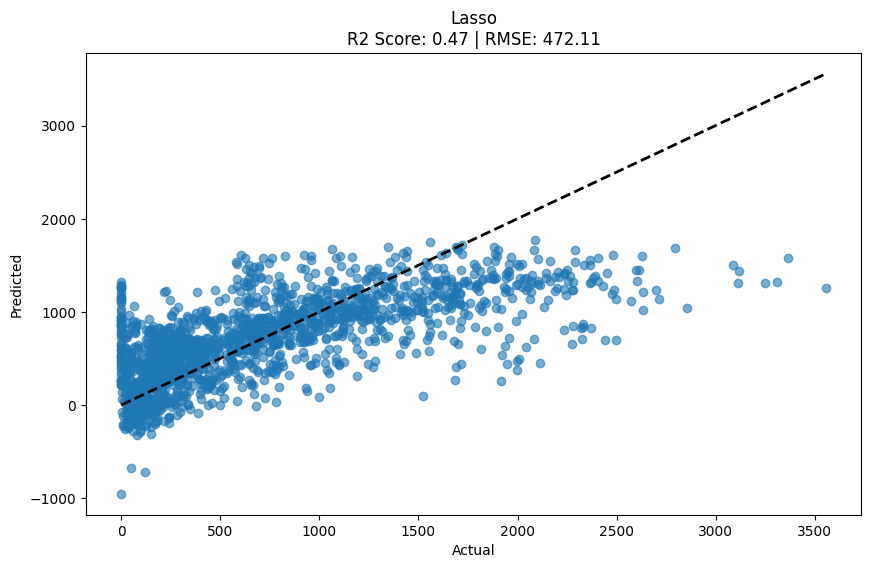

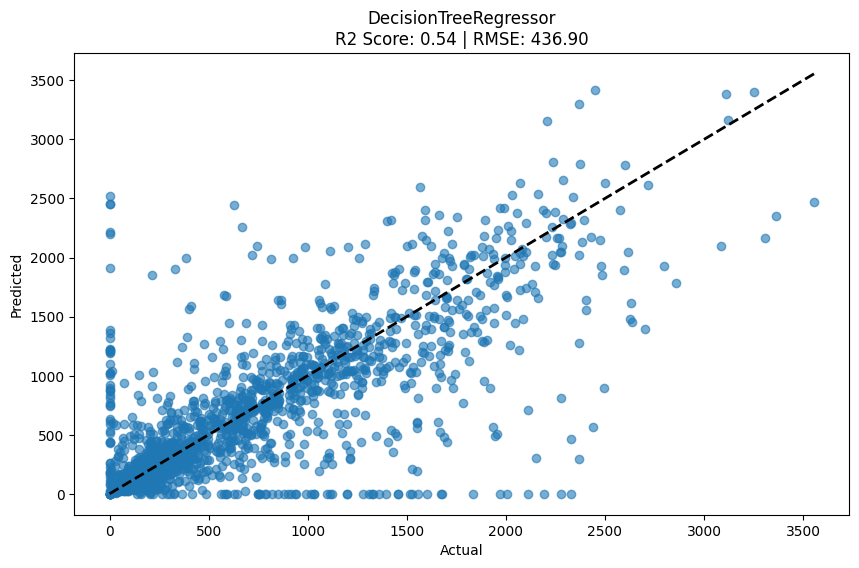

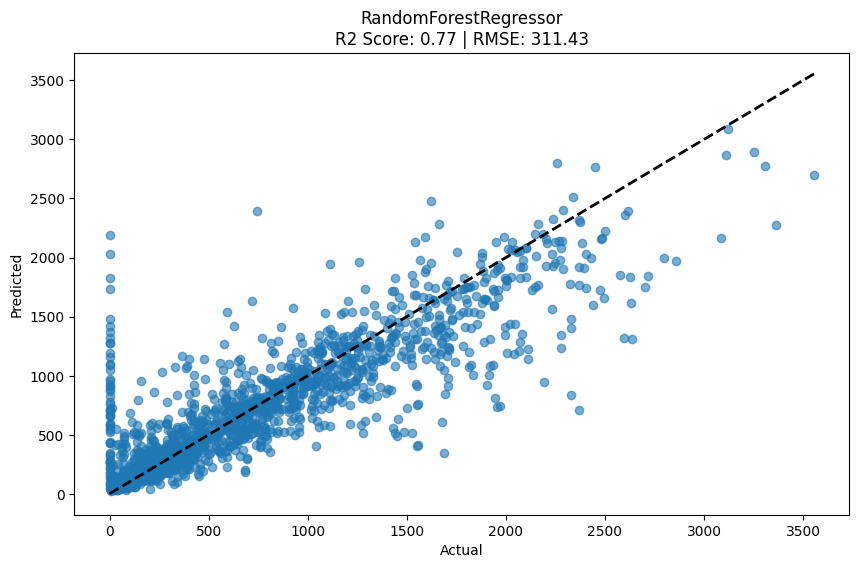

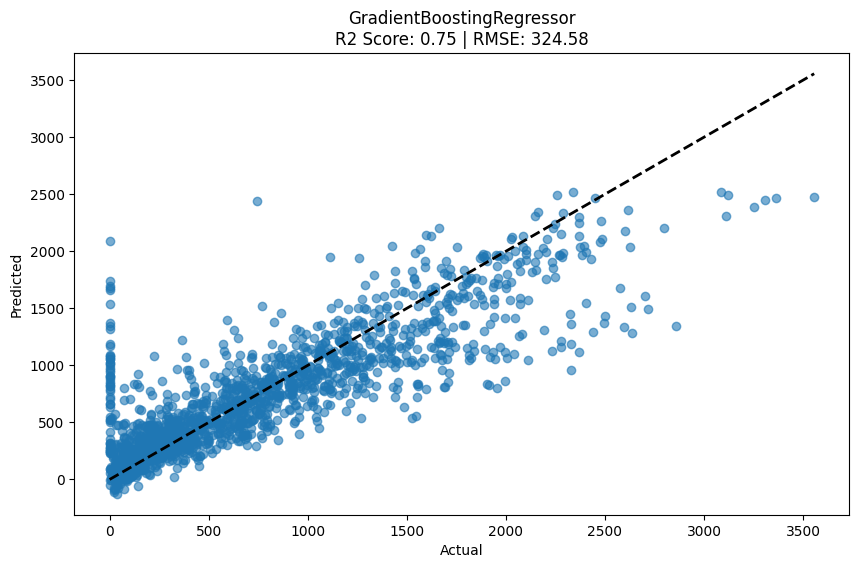

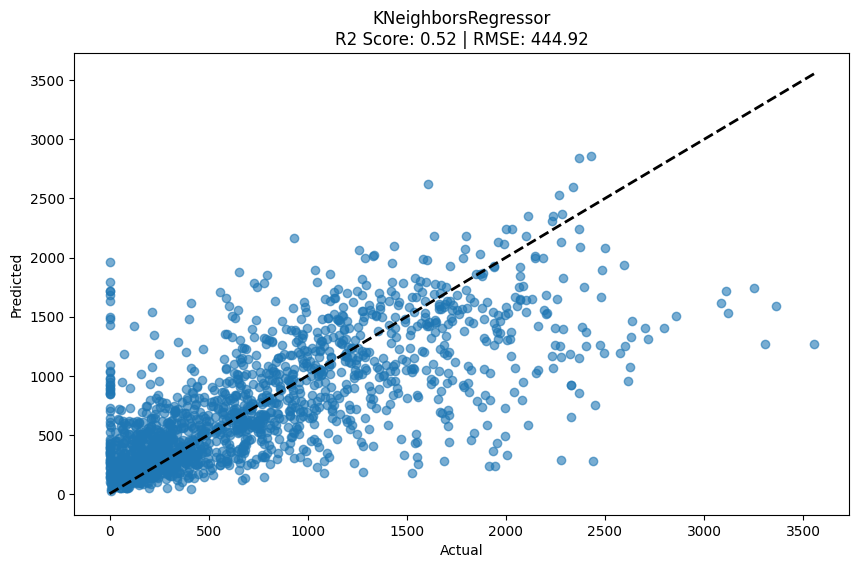

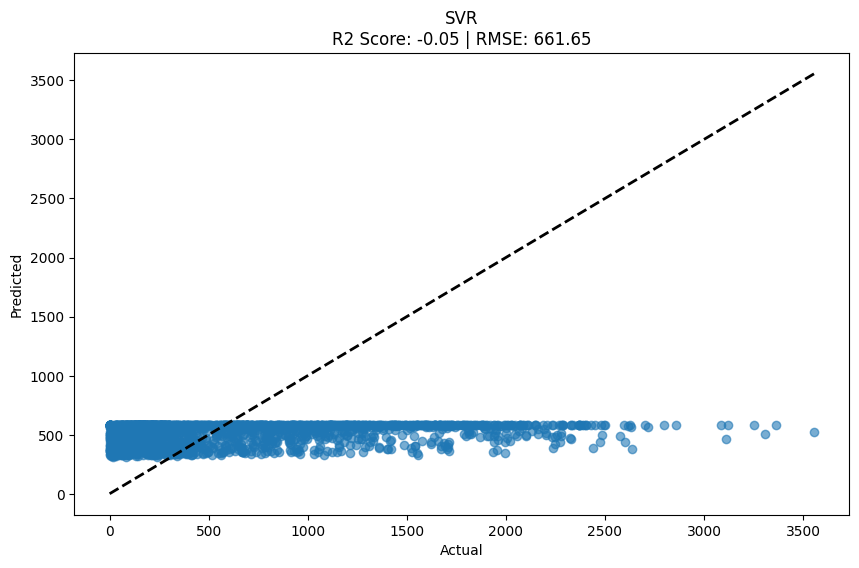

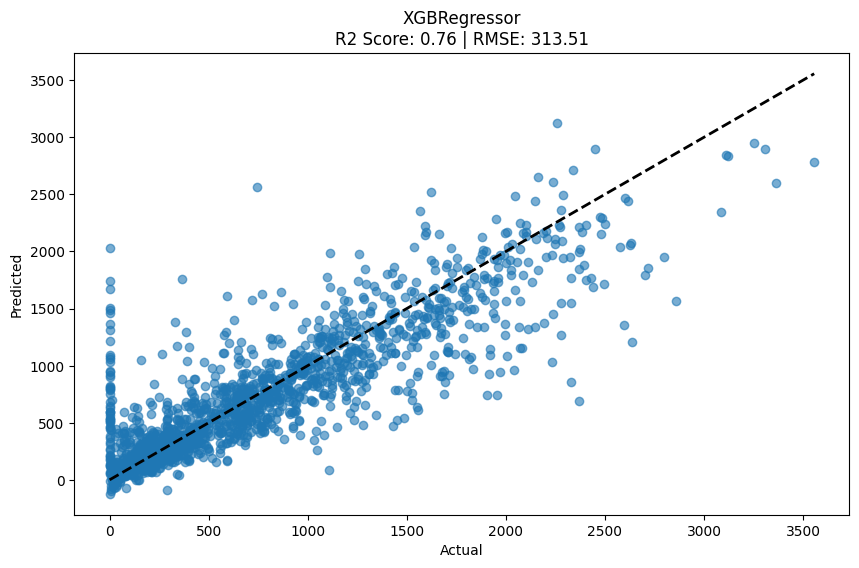

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 9
[LightGBM] [Info] Start training from score 704.767837


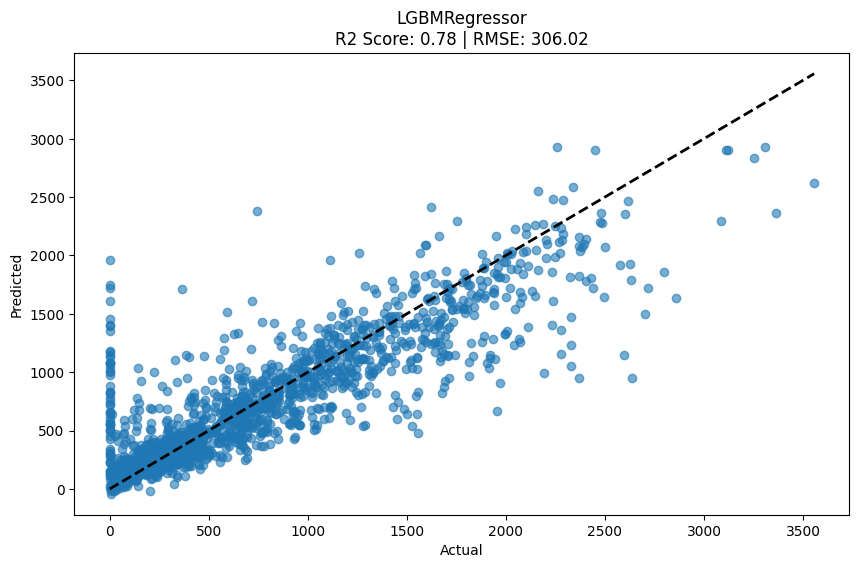

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# List of models to evaluate
models = [
    LinearRegression(), Ridge(), Lasso(),
    DecisionTreeRegressor(), RandomForestRegressor(),
    GradientBoostingRegressor(), KNeighborsRegressor(),
    SVR(), xgb.XGBRegressor(), LGBMRegressor()
]

# Model Evaluation with Visualization
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate R2 Score and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Plotting Actual vs Predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Line for perfect prediction
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model.__class__.__name__}\nR2 Score: {r2:.2f} | RMSE: {rmse:.2f}')
    plt.show()

In [17]:
models = [
    LinearRegression(), Ridge(), Lasso(),
    DecisionTreeRegressor(), RandomForestRegressor(),
    GradientBoostingRegressor(), KNeighborsRegressor(),
    SVR(), xgb.XGBRegressor(), LGBMRegressor()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model.__class__.__name__} R2 Score: {r2_score(y_test, y_pred)}')
    print(f'{model.__class__.__name__} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}\n')

LinearRegression R2 Score: 0.46506003643151583
LinearRegression RMSE: 472.1024499202452

Ridge R2 Score: 0.46506048522899046
Ridge RMSE: 472.1022518807958

Lasso R2 Score: 0.4650466464080172
Lasso RMSE: 472.1083584555681

DecisionTreeRegressor R2 Score: 0.5579652820534277
DecisionTreeRegressor RMSE: 429.15277252855975

RandomForestRegressor R2 Score: 0.7716274487491515
RandomForestRegressor RMSE: 308.4648509547618

GradientBoostingRegressor R2 Score: 0.7471449418048628
GradientBoostingRegressor RMSE: 324.5783552280589

KNeighborsRegressor R2 Score: 0.524890286868713
KNeighborsRegressor RMSE: 444.9187279435266

SVR R2 Score: -0.05071178805998877
SVR RMSE: 661.6457612734322

XGBRegressor R2 Score: 0.7640926764158626
XGBRegressor RMSE: 313.51219883634167

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_col_wise=true` to remove the overh

In [18]:
# Hyperparameter Tuning with Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data[numerical_cols]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

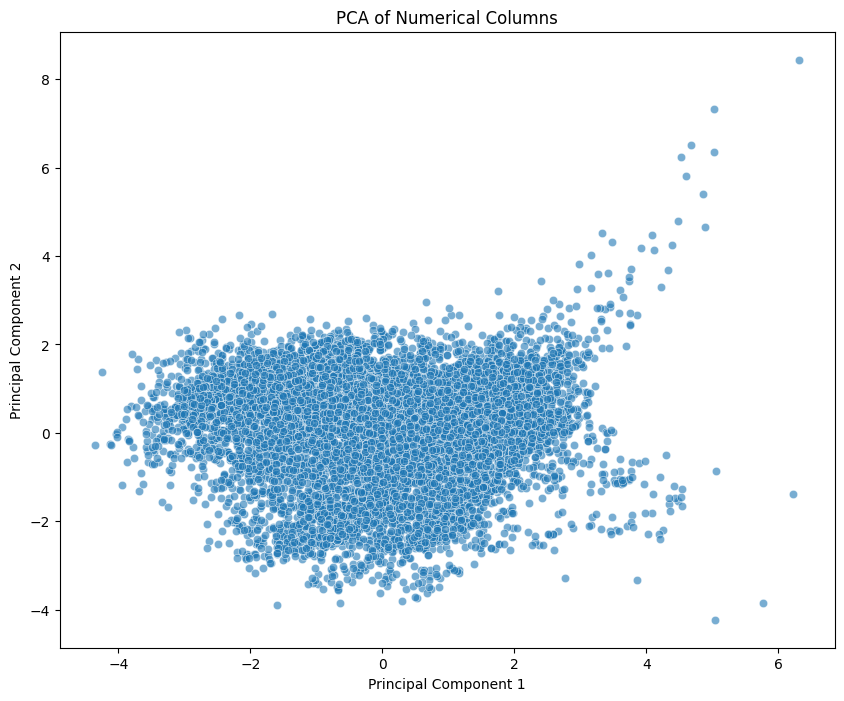

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df, alpha=0.6)
plt.title('PCA of Numerical Columns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

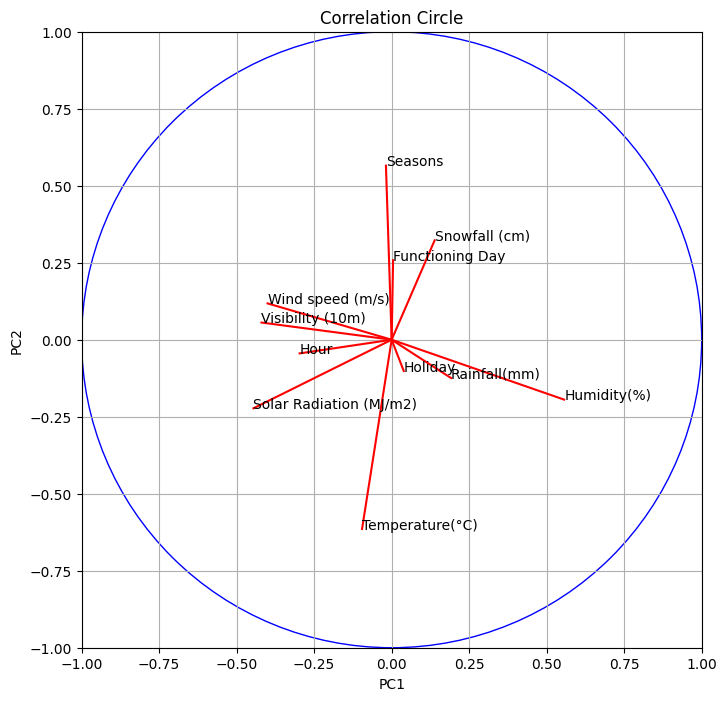

In [22]:
# Prétraitement des données
X = pd.get_dummies(data.drop(['Rented Bike Count', 'Date'], axis=1))

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)

for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    ax.plot([0, x], [0, y], color='red')
    ax.text(x, y, X.columns[i], color='black')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Correlation Circle')
ax.grid(True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()